# Ensemble Learning

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/Stitch-bleu/inde-577-project/edit/main/Supervised/8_Ensemble%20Learning/Ensemble_Learning.ipynb)

## Introduction
Ensemble Learning is a powerful approach in machine learning that combines predictions from multiple models to create a more robust and accurate predictive model. This method primarily includes two techniques: Bagging (Bootstrap Aggregating), which builds multiple instances of the same model on different subsets of the data to reduce variance, with Random Forests being a popular example; and Boosting, which builds models sequentially, each focusing on correcting errors made by previous models, effectively reducing bias. Common boosting models include AdaBoost, Gradient Boosting, and XGBoost. Together, these methods help to balance variance and bias in predictions, improving the overall generalization and reliability of the model.

## 1. Data

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/Users/stitchbleu/577_Project/Data/day.csv')
data.info()
data.head()
print("First few rows of the dataset:")
print("\nMissing values per column:")
print(data.isnull().sum())

X = data.drop(columns=['cnt']) 
y = data['cnt']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nData preprocessing complete. Ready for model training.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
First few rows of the dataset:

Missing values per column:
instant       0
dteday        0
se

## 2. Train the Random Forest Regressor

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R^2 Score: {r2_rf:.4f}")


Random Forest Regressor Performance:
Mean Absolute Error (MAE): 68.20
Mean Squared Error (MSE): 11472.50
R^2 Score: 0.9971


## 3. Train the Gradient Boosting Regressor

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"R^2 Score: {r2_gb:.4f}")

Gradient Boosting Regressor Performance:
Mean Absolute Error (MAE): 78.67
Mean Squared Error (MSE): 12859.25
R^2 Score: 0.9968


## 4.  Train and Evaluate an AdaBoost RegressorGradient Importance Plot

In [21]:
from sklearn.ensemble import AdaBoostRegressor

ada_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

ada_model.fit(X_train, y_train)

y_pred_ada = ada_model.predict(X_test)

mae_ada = mean_absolute_error(y_test, y_pred_ada)
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)

print("AdaBoost Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae_ada:.2f}")
print(f"Mean Squared Error (MSE): {mse_ada:.2f}")
print(f"R^2 Score: {r2_ada:.4f}")


AdaBoost Regressor Performance:
Mean Absolute Error (MAE): 252.09
Mean Squared Error (MSE): 104653.92
R^2 Score: 0.9739


## 5. Summarize and Compare Model Performance

Comparison of Ensemble Model Performance:
               Model  Mean Absolute Error (MAE)  Mean Squared Error (MSE)  \
0      Random Forest                  68.202381              11472.504827   
1  Gradient Boosting                  78.667519              12859.251010   
2           AdaBoost                 252.089571             104653.922233   

   R^2 Score  
0   0.997139  
1   0.996793  
2   0.973901  


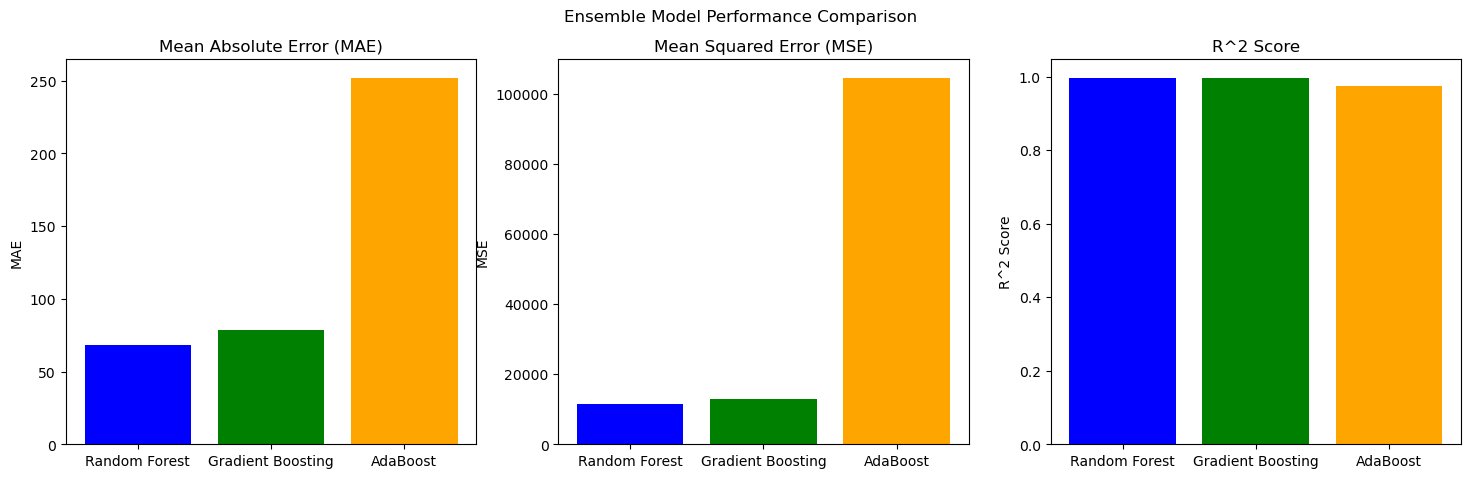

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.DataFrame({
    "Model": ["Random Forest", "Gradient Boosting", "AdaBoost"],
    "Mean Absolute Error (MAE)": [mae_rf, mae_gb, mae_ada],
    "Mean Squared Error (MSE)": [mse_rf, mse_gb, mse_ada],
    "R^2 Score": [r2_rf, r2_gb, r2_ada]
})

print("Comparison of Ensemble Model Performance:")
print(results)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# MAE
axes[0].bar(results["Model"], results["Mean Absolute Error (MAE)"], color=['blue', 'green', 'orange'])
axes[0].set_title("Mean Absolute Error (MAE)")
axes[0].set_ylabel("MAE")

# MSE
axes[1].bar(results["Model"], results["Mean Squared Error (MSE)"], color=['blue', 'green', 'orange'])
axes[1].set_title("Mean Squared Error (MSE)")
axes[1].set_ylabel("MSE")

# R square
axes[2].bar(results["Model"], results["R^2 Score"], color=['blue', 'green', 'orange'])
axes[2].set_title("R^2 Score")
axes[2].set_ylabel("R^2 Score")

plt.suptitle("Ensemble Model Performance Comparison")
plt.show()


## 6. Hyperparameter Tuning

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation MSE: 15463.0574899913


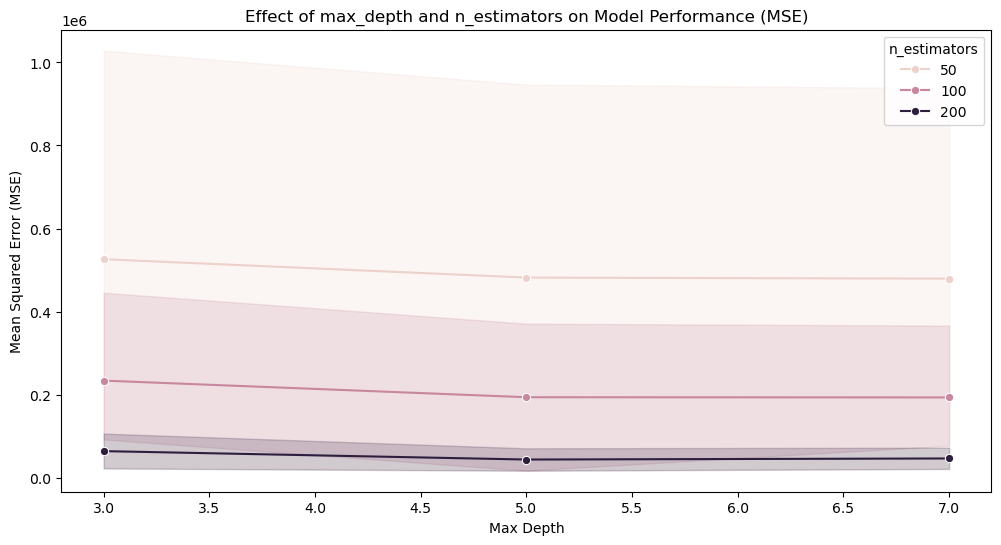

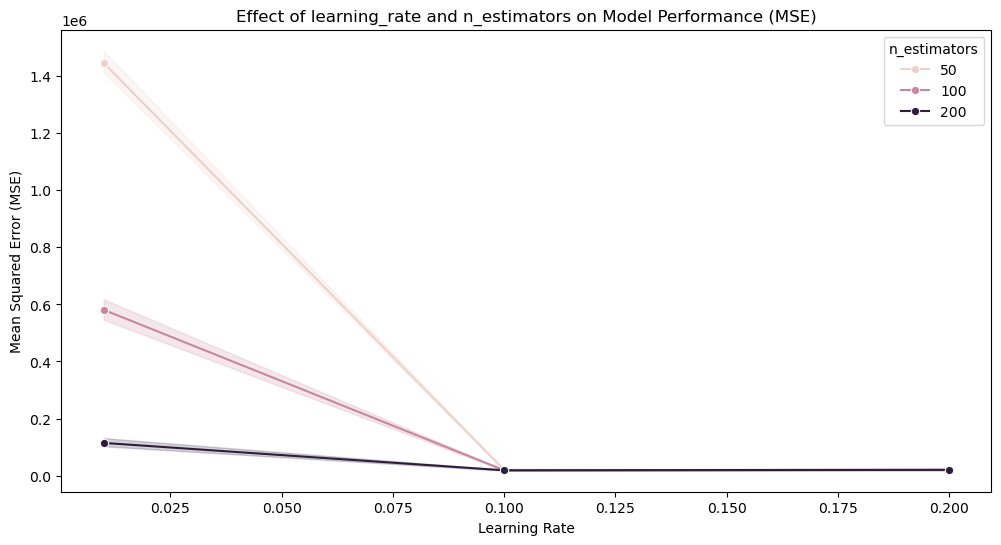

In [35]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Initialize the GridSearchCV with Gradient Boosting Regressor
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation MSE:", best_score)




import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Convert GridSearchCV results to a DataFrame for easy plotting
results_df = pd.DataFrame(grid_search.cv_results_)

# Plot the effect of max_depth on performance (using MSE) for different values of n_estimators
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=results_df,
    x="param_max_depth",
    y=-results_df["mean_test_score"],  # Using negative MSE for interpretation
    hue="param_n_estimators",
    marker="o"
)
plt.title("Effect of max_depth and n_estimators on Model Performance (MSE)")
plt.xlabel("Max Depth")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend(title="n_estimators")
plt.show()

# Plot the effect of learning_rate on performance (using MSE) for different values of n_estimators
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=results_df,
    x="param_learning_rate",
    y=-results_df["mean_test_score"],  # Using negative MSE for interpretation
    hue="param_n_estimators",
    marker="o"
)
plt.title("Effect of learning_rate and n_estimators on Model Performance (MSE)")
plt.xlabel("Learning Rate")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend(title="n_estimators")
plt.show()

